# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

## Uncomment to download data files
#!curl -O https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
#!mkdir data
#!unzip traffic-signs-data.zip -d data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

allsigns=np.concatenate([train['labels'], valid['labels'], test['labels']])

# TODO: Number of training examples
n_train = train['labels'].shape[0]

# TODO: Number of validation examples
n_validation = valid['labels'].shape[0]

# TODO: Number of testing examples.
n_test = test['labels'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(allsigns).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Total number of examples =", allsigns.shape[0])

print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Total number of examples = 51839
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

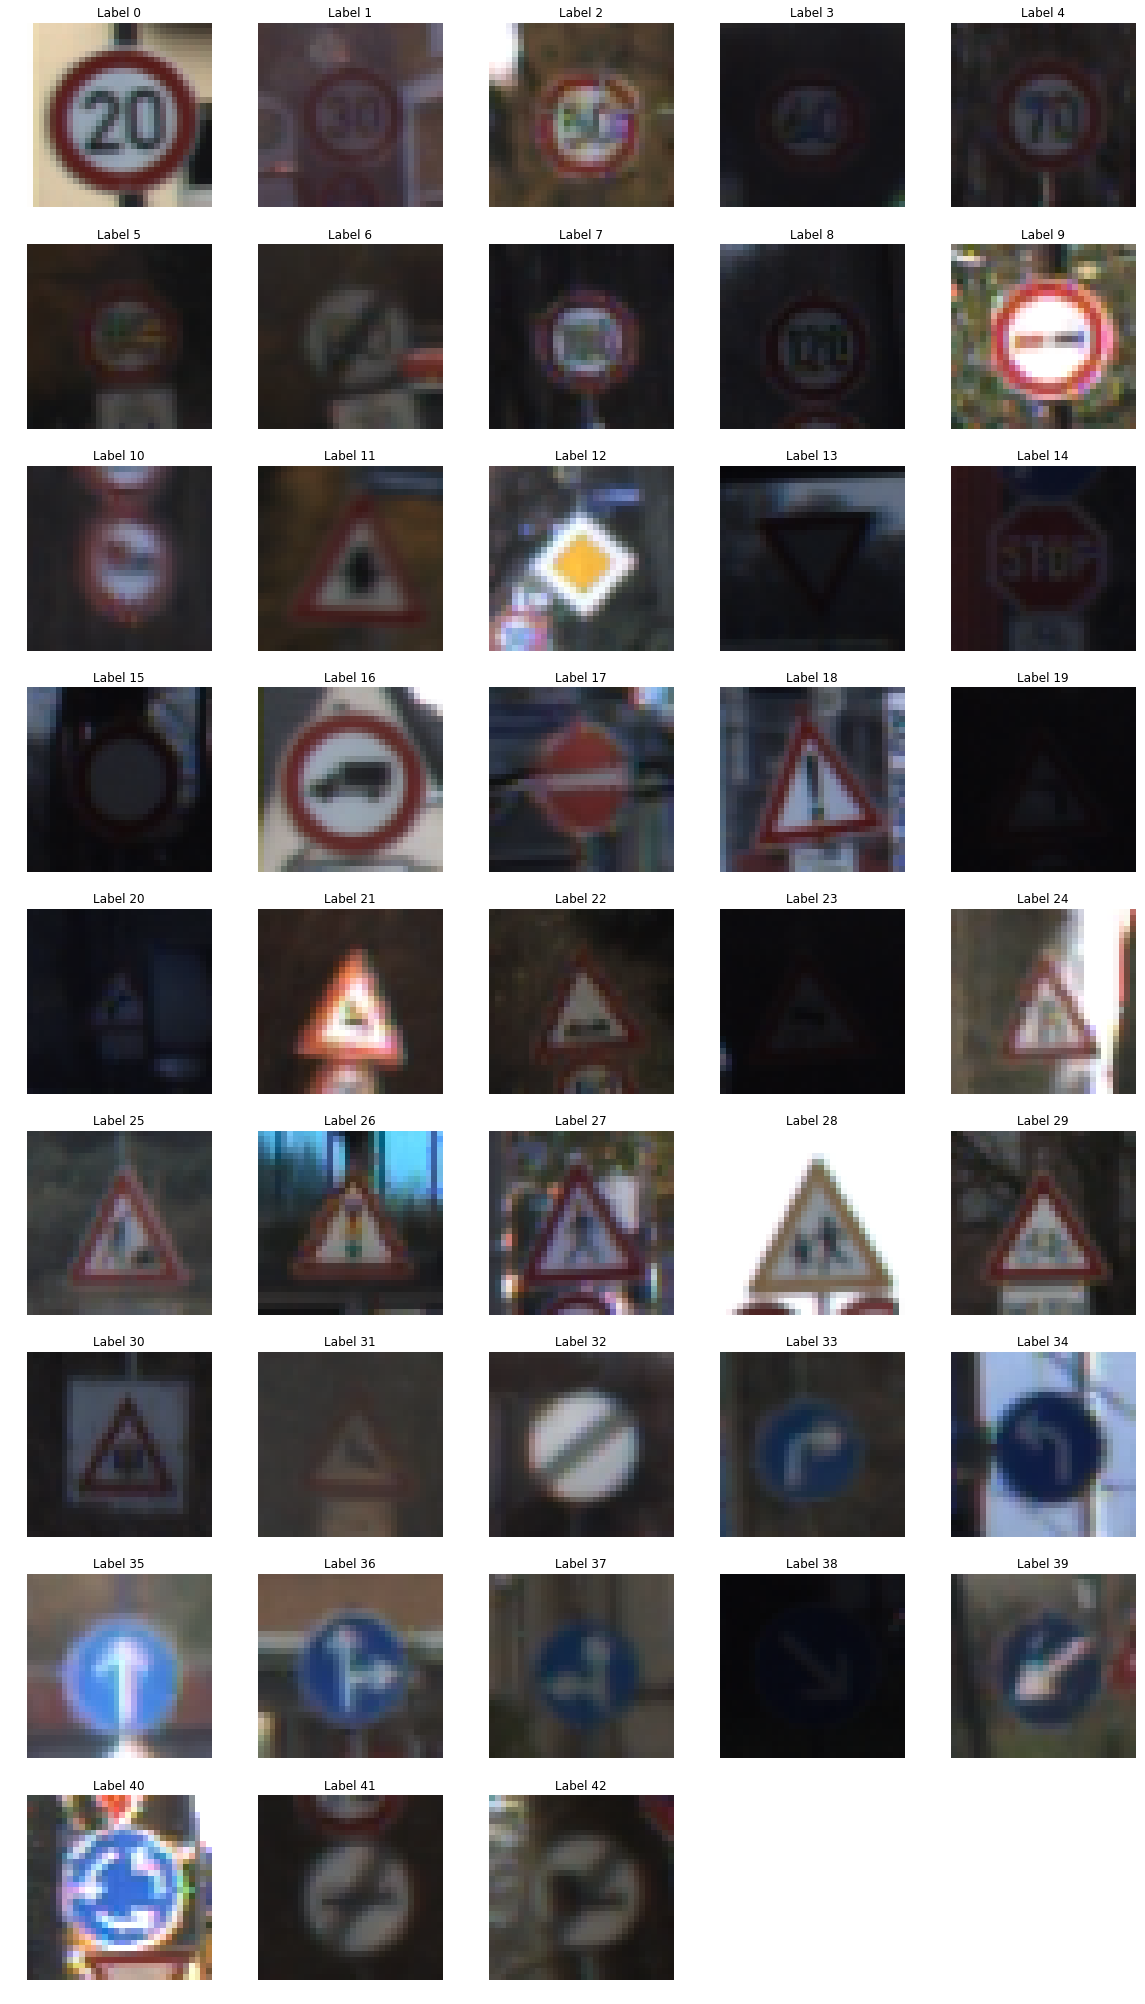

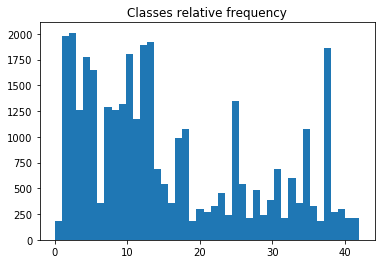

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

## NOTE: Had to install opencv via conda and/or pip according to machine
## - on aws with conda:
#!apt-get install libgtk-x11-2.0
#!conda install opencv -y
## - on notebook native
#!pip3 install --upgrade cv2 matplotlib opencv-python

import matplotlib.pyplot as plt
import cv2 as cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

#import pdb; pdb.set_trace()

# Show one picture for each label

plt.figure(figsize=(5*4, 9*4))

for k in range(0, n_classes):
    """
    We print the sign classes (labels)
    """
    
    plt.subplot(9, 5, k+1)
    k_match = [y_train == k]
    # z=numpy.where returns a list with two arrays, where z[0] is a list of the rows and z[1] is a list of columnns containing matching elements:
    k_class = np.where(k_match)[1][0]   
    
    title = "Label " + str(y_train[k_class])
    frame = X_train[k_class, :, :, :]
    
    plt.title(title)
    plt.axis('off')
    plt.imshow(frame)
    
plt.figure(), plt.title('Classes relative frequency')
plt.hist(y_train, bins = n_classes);

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# crop and resize
import math

def pp_crop_to_coords(frame, coords, sizes, side):
    """
    Crops the frame of size side to the box given by coords of the original picture of size sizes
    """
    
    wx, wy = sizes
    x1, y1, x2, y2 = coords

    x1_ = math.floor((side*x1)/wx)
    y1_ = math.floor((side*y1)/wy)
    x2_ = math.floor((side*x2)/wx)
    y2_ = math.floor((side*y2)/wy)

    frame_cropped_small = np.copy(frame[y1_:y2_,x1_:x2_])
    frame_cropped = cv2.resize(frame_cropped_small, (side, side))
   
    return frame_cropped

def crop_all(X, n):

    X_pp = []
    print("Cropping images...")
    for sample in range(0, n):
        frame = np.copy(X[sample])
        coords = train['coords'][sample]
        sizes = train['sizes'][sample]
        t = pp_crop_to_coords(frame, coords, sizes, 32)
        X_pp.append(t)
        
    print("OK")
    return X_pp

X_train = crop_all(X_train, n_train)
X_valid = crop_all(X_valid, n_validation) 
X_test = crop_all(X_test, n_test) 


Cropping images...
OK
Cropping images...
OK
Cropping images...
OK


Training set MU_EMPIRICAL =  0.336061999183


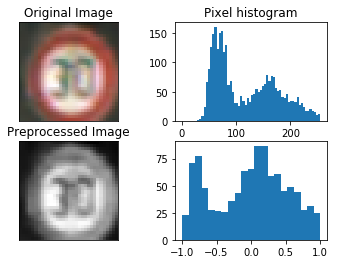

In [5]:
# Image Preprocessing sandboxing

import math
import matplotlib.pyplot as plt
import cv2 as cv2

def get_v_channel(x):
    hsv = cv2.cvtColor(x, cv2.COLOR_BGR2HSV)
    v = hsv[:,:,2]
    return v

MU_EMPIRICAL = np.mean(X_train)/256
print("Training set MU_EMPIRICAL = ", MU_EMPIRICAL)

MU_EMPIRICAL += 0.1
def normalize_0_1(t):
    t = t - MU_EMPIRICAL
    t = (t-np.min(t))/(np.max(t)-np.min(t))*2.0-1.0
    
    return t

_SIGMA_RD = 1
_nx, _ny = (32, 32)
_x = np.linspace(-2, 2, _nx)
_y = np.linspace(-2, 2, _ny)
_xv, _yv = np.meshgrid(_x, _y, sparse=False, indexing='ij')
_rd = np.exp(-(_xv**2+_yv**2)/(2*_SIGMA_RD**2))
    
def pp_radial_decay(X):
    """ 
    Preprocess a frame to make it easier for the nn to classify it.
    """
    frame_out = (X*_rd)
    return frame_out

def preprocess(x):
    t = get_v_channel(x)
    t = normalize_0_1(t)
    #t = pp_radial_decay(t)
    return t
   
# Show example of what happened to an image and its histogram
i_example = np.random.randint(n_train)

X_example = X_train[i_example]
X_example_pp = preprocess(X_example)#, train['coords'][i_example], train['sizes'][i_example], 32))

plt.subplot(221, title = 'Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(np.array(X_example))
plt.subplot(222, title='Pixel histogram')
plt.hist(np.ndarray.flatten(X_example), bins=64, range=[0, 255]);
plt.subplot(223, title = 'Preprocessed Image') , plt.xticks([]), plt.yticks([])
plt.imshow(X_example_pp, cmap='gray')
plt.subplot(224)
plt.hist(np.ndarray.flatten(X_example_pp), bins=21, range=[-1, 1]);

In [6]:
# Prepare for LeNet input

from sklearn.utils import shuffle

def preprocess_n(X):
    X_pp = []
    for x in X:
        t = preprocess(x)
        X_pp.append(t)
    return X_pp



In [7]:
# Preproccess the whole training and validation sets
print("Preprocessing training images...")
_X_train_pp = preprocess_n(X_train)
print("OK")
print("Preprocessing validation images...")
_X_valid_pp = preprocess_n(X_valid) 
print("OK")
print("Preprocessing test images...")
_X_test_pp = preprocess_n(X_test) 
print("OK")


Preprocessing training images...
OK
Preprocessing validation images...
OK
Preprocessing test images...
OK


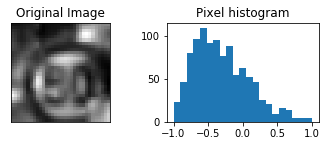

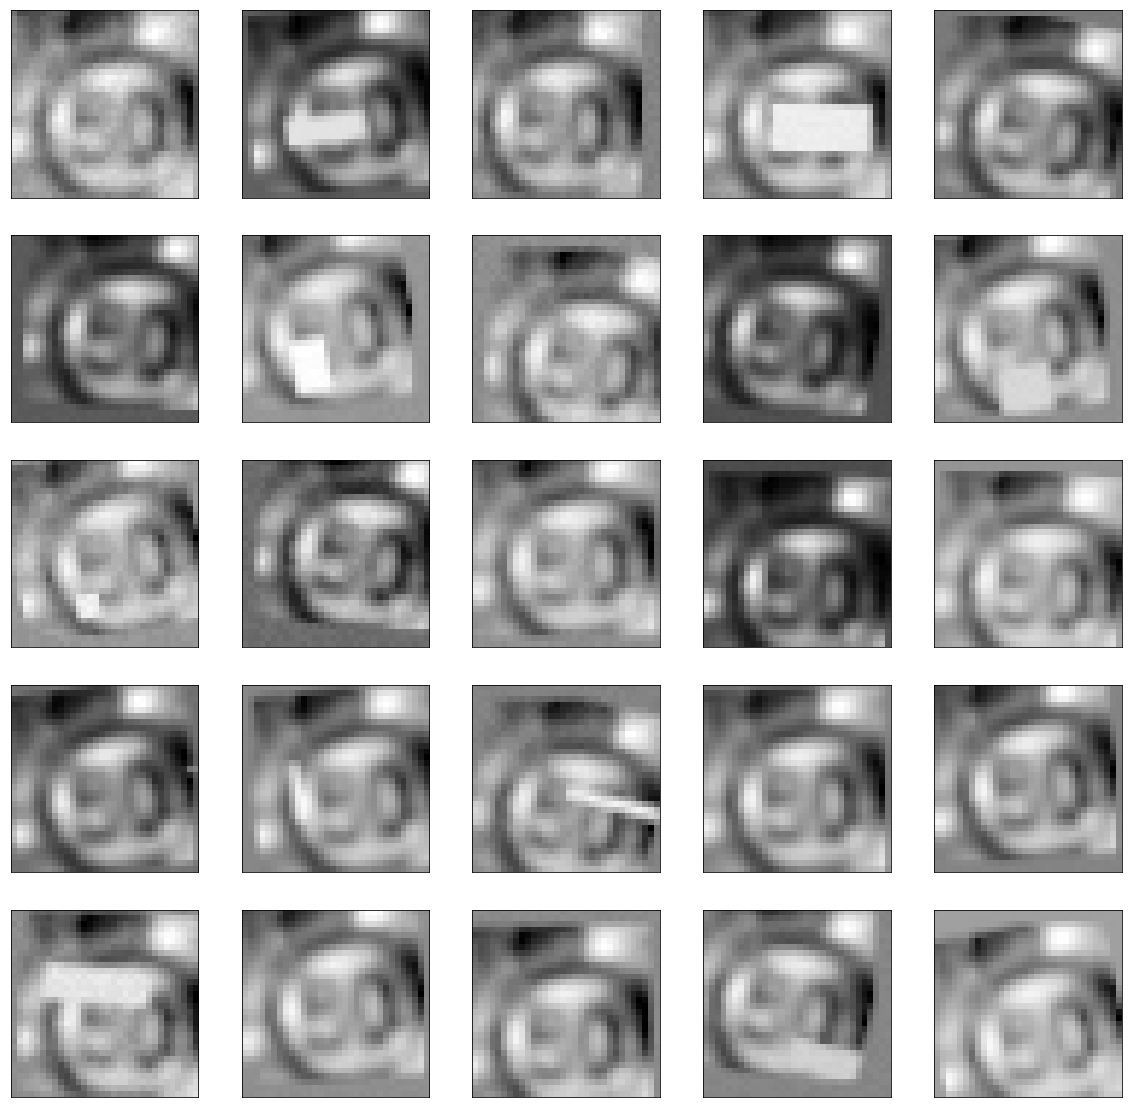

In [8]:
### Generate more data


from scipy import ndimage
import random


def get_new_img(frame):
    oldimg = np.copy(frame)
    mean_color = oldimg[0,0]
    
    # black out some sections
    NI_PROB_OF_STICKER = 0.5
    NI_STICKER_MAX_WIDTH = 20
    NI_STICKER_MAX_HEIGHT = 10
    sx1 = math.floor(np.random.uniform(0, 32))
    sy1 = math.floor(np.random.uniform(0, 32))
    sx2 = sx1 + math.floor(np.random.uniform(0, NI_STICKER_MAX_WIDTH))
    sy2 = sy1 + math.floor(np.random.uniform(0, NI_STICKER_MAX_HEIGHT))
    scolor = np.random.uniform(0,1)
    
    sticker = oldimg
    if (np.random.uniform(0,1) < NI_PROB_OF_STICKER):     
        sticker = cv2.rectangle(sticker, (sx1, sy1), (sx2, sy2), scolor, thickness=-1)
    
    # rotate
    angle = random.uniform(-15, 15)
    
    rows, cols = sticker.shape
    R = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
    newimg = cv2.warpAffine(sticker, R, (cols, rows), borderValue=mean_color/2)    
    
    # Translation
    tr_max = 3
    tr_x = np.random.uniform(-tr_max, tr_max)
    tr_y = np.random.uniform(-tr_max, tr_max)
    T = np.float32([[1,0,tr_x],[0,1,tr_y]])
    newimg = cv2.warpAffine(newimg, T, (cols,rows), borderValue=mean_color/2)

    # Adjust gamma
    gamma = random.uniform(0.3, 5.0)
    newimg = (newimg+1.0) ** (1/gamma) - 1.0
    
    # add noise
    NI_NOISE_MAX = 0.025
    noise_amplitude = np.random.uniform(0, NI_NOISE_MAX)
    noise = cv2.randu(np.copy(oldimg), -noise_amplitude, noise_amplitude) 
    
    newimg = newimg + noise
    
    
    
    return newimg
    
    
def generate_new_img(images, k):
    # pick a random image of class k
    
    k_match = [y_train == k]
    # z=numpy.where returns a list with two arrays, where z[0] is a list of the rows and z[1] is a list of columnns containing matching elements:
    k_class = np.where(k_match)[1]
    frame = images[k_class[random.randint(0, len(k_class)-1)]]
    
    newimg = get_new_img(frame)
    
    return newimg


# Show example of what happened to an image and its histogram
i_example = np.random.randint(n_train)

X_example_new = _X_train_pp[i_example]

plt.subplot(221, title = 'Original Image'), plt.xticks([]), plt.yticks([])
plt.imshow(np.array(X_example_new), cmap='gray')
plt.subplot(222, title='Pixel histogram')
plt.hist(np.ndarray.flatten(X_example_new), bins=21, range=[-1, 1]);

N_show_sqrt = 5
plt.figure(figsize=(N_show_sqrt*4, N_show_sqrt*4))

for k in range(0, N_show_sqrt**2):
    plt.subplot(N_show_sqrt, N_show_sqrt, k+1)
    X_example_pp_new = get_new_img(X_example_new)#, train['coords'][i_example], train['sizes'][i_example], 32))
    #plt.subplot(121, title = 'Preprocessed Image') , plt.xticks([]), plt.yticks([])
    plt.imshow(X_example_pp_new, cmap='gray'),  plt.xticks([]), plt.yticks([])
    #plt.subplot(122)
    #plt.hist(np.ndarray.flatten(X_example_pp_new), bins=21, range=[-1, 1]);
        



Adding 2333 images to class 0
Training set shape (37132, 32, 32) , Validation set shape,  (37132,)
Adding 533 images to class 1
Training set shape (37665, 32, 32) , Validation set shape,  (37665,)
Adding 503 images to class 2
Training set shape (38168, 32, 32) , Validation set shape,  (38168,)
Adding 1253 images to class 3
Training set shape (39421, 32, 32) , Validation set shape,  (39421,)
Adding 743 images to class 4
Training set shape (40164, 32, 32) , Validation set shape,  (40164,)
Adding 863 images to class 5
Training set shape (41027, 32, 32) , Validation set shape,  (41027,)
Adding 2153 images to class 6
Training set shape (43180, 32, 32) , Validation set shape,  (43180,)
Adding 1223 images to class 7
Training set shape (44403, 32, 32) , Validation set shape,  (44403,)
Adding 1253 images to class 8
Training set shape (45656, 32, 32) , Validation set shape,  (45656,)
Adding 1193 images to class 9
Training set shape (46849, 32, 32) , Validation set shape,  (46849,)
Adding 713 ima

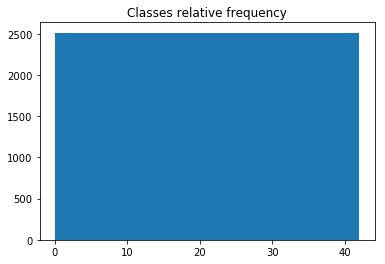

In [9]:
# process the whole batch
class_count = np.bincount(y_train)
target_count = math.ceil(max(class_count)*1.25) 

y_train_aug = np.copy(y_train)
_X_train_pp_aug = np.copy(_X_train_pp)

# iterate through classes
for k in range(n_classes):
    
    # add until target count is reached
    if class_count[k] < target_count:
        
        n_to_generate = target_count - class_count[k]
        X_new = []
        y_new = []
        print("Adding", n_to_generate, "images to class", k)
        
        # Make the number of additional pictures needed to arrive at the mean
        for i in range(n_to_generate):
            
            newimg = generate_new_img(_X_train_pp, k)
            X_new.append(newimg)
            y_new.append(k)
        
        # Append the pictures generated for each class back to the original data
        _X_train_pp_aug = np.append(_X_train_pp_aug, np.array(X_new), axis=0)
        y_train_aug = np.append(y_train_aug, np.array(y_new), axis=0)
        print("Training set shape", _X_train_pp_aug.shape, ', Validation set shape, ', y_train_aug.shape)
        
        
plt.figure(), plt.title('Classes relative frequency')
plt.hist(y_train_aug, bins = n_classes);

In [10]:
# Shuffle
print('Shuffling...')
_X_train_pp_aug_s, y_train_pp = shuffle(_X_train_pp_aug, y_train_aug)
print('OK')

# Resize arrays so they match LeNet's input indices
print('Reshaping arrays...')
X_train_pp = np.array(_X_train_pp_aug_s)[..., np.newaxis]
X_valid_pp = np.array(_X_valid_pp)[..., np.newaxis]
X_test_pp = np.array(_X_test_pp)[..., np.newaxis]
print('OK')

Shuffling...
OK
Reshaping arrays...
OK


In [11]:
print("Empirical MU =", np.mean(X_train_pp))
print("Empirical SIGMA =", np.std(X_train_pp))

Empirical MU = -0.090235769464
Empirical SIGMA = 0.54103152423


### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Lenet implementation

import tensorflow as tf

N_CLASSSES = n_classes
MU = 0
SIGMA =0.2

print('Using MU = ' + str(MU))
print('Using SIGMA = ' + str(SIGMA))

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = MU
    sigma = SIGMA

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.ones(6))*0.0
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 2*2*N_CLASSSES.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 2*2*N_CLASSSES), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(2*2*N_CLASSSES))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)    

    # SOLUTION: Layer 4: Fully Connected. Input = 2*2*N_CLASSSES. Output = 2*N_CLASSSES.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(2*2*N_CLASSSES, 2*N_CLASSSES), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(2*N_CLASSSES))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)    

    # SOLUTION: Layer 5: Fully Connected. Input = 2*N_CLASSSES. Output = N_CLASSSES.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(2*N_CLASSSES, N_CLASSSES), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(N_CLASSSES))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

Using MU = 0
Using SIGMA = 0.2


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
# Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Features and labels placeholders

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, N_CLASSSES)

# Define training pipeline

KEEP_PROB = 0.5
EPOCHS = math.ceil(np.log(n_train) /  KEEP_PROB)
BATCH_SIZE =  math.ceil(1.25* n_classes / KEEP_PROB)
LEARNING_RATE = 0.002

rate = LEARNING_RATE

print("Using EPOCHS={:d}, BATCH_SIZE={:d}, LEARNING_RATE={:f}, KEEP_PROB={:f}".format(EPOCHS, BATCH_SIZE, LEARNING_RATE, KEEP_PROB))

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Using EPOCHS=21, BATCH_SIZE=108, LEARNING_RATE=0.002000, KEEP_PROB=0.500000


In [14]:
# Evaluate the model

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate_acc(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_loss += (loss* len(batch_x))
    return total_loss / num_examples

Using EPOCHS=21, BATCH_SIZE=108, LEARNING_RATE=0.002000, KEEP_PROB=0.500000
Training...

EPOCH 1 ...
Validation Accuracy = 0.806
Training Accuracy = 0.734



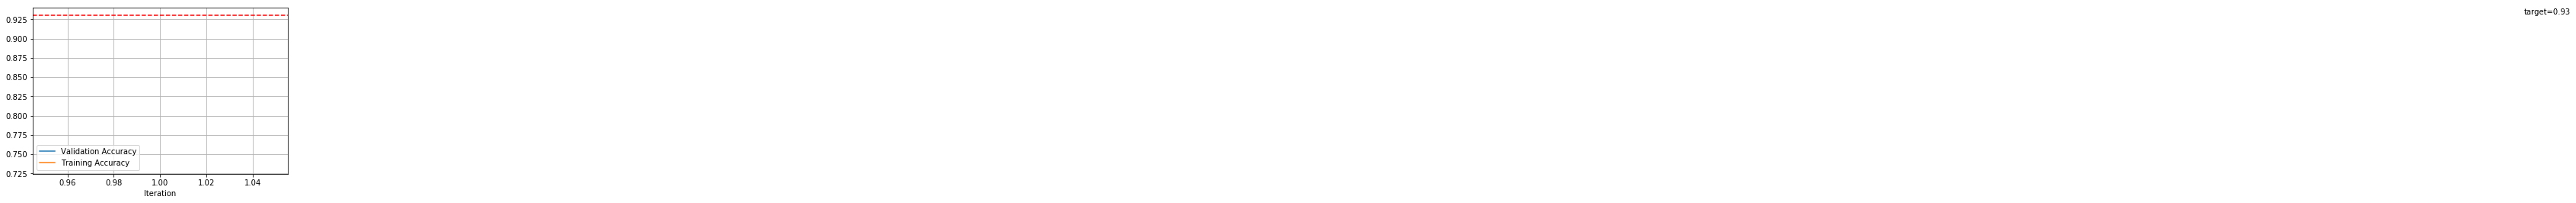

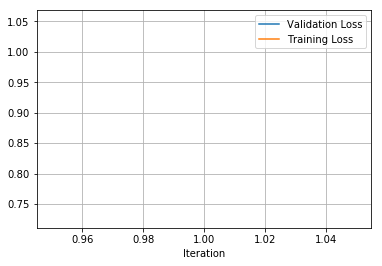

EPOCH 2 ...
Validation Accuracy = 0.890
Training Accuracy = 0.849



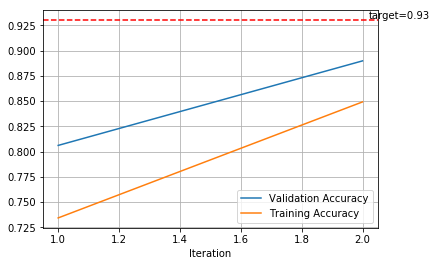

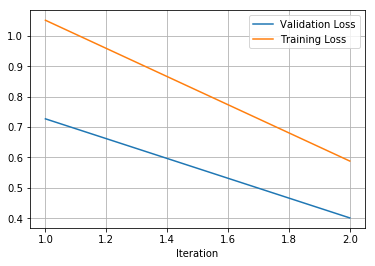

EPOCH 3 ...
Validation Accuracy = 0.907
Training Accuracy = 0.887



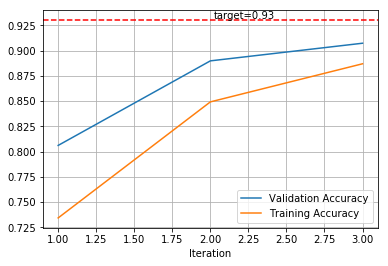

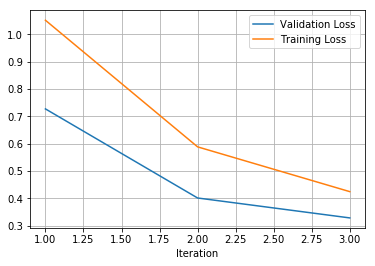

EPOCH 4 ...
Validation Accuracy = 0.923
Training Accuracy = 0.908



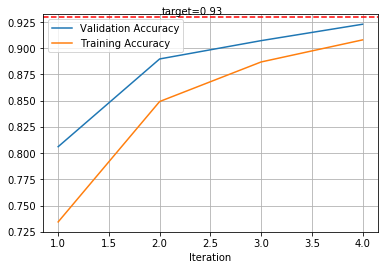

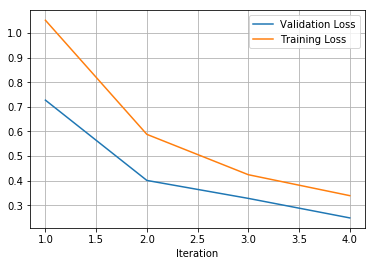

EPOCH 5 ...
Validation Accuracy = 0.922
Training Accuracy = 0.919



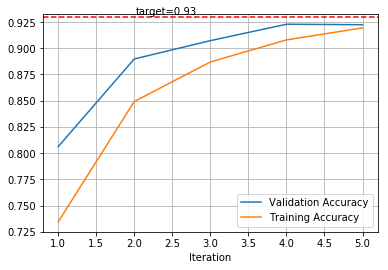

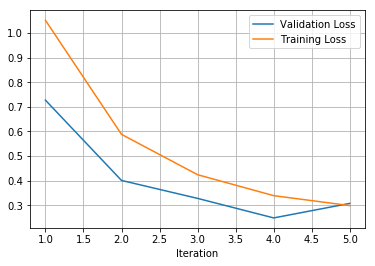

EPOCH 6 ...
Validation Accuracy = 0.931
Training Accuracy = 0.928



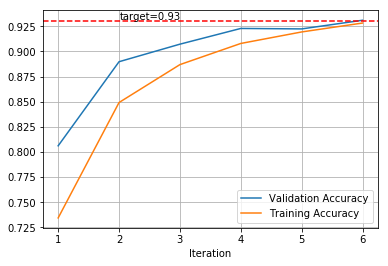

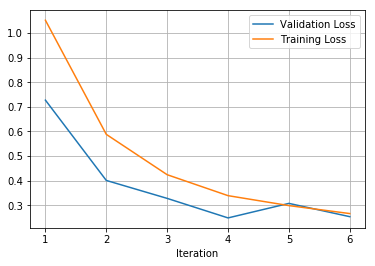

EPOCH 7 ...
Validation Accuracy = 0.935
Training Accuracy = 0.936



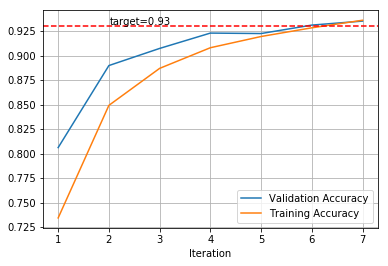

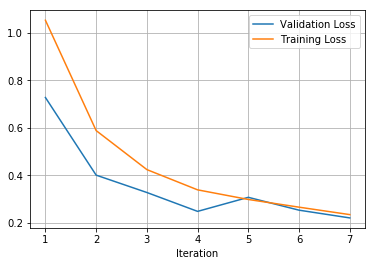

EPOCH 8 ...
Validation Accuracy = 0.922
Training Accuracy = 0.929



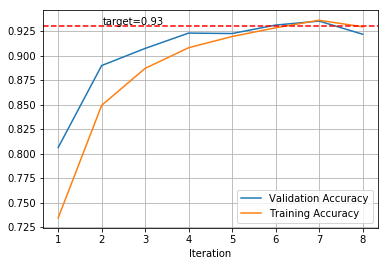

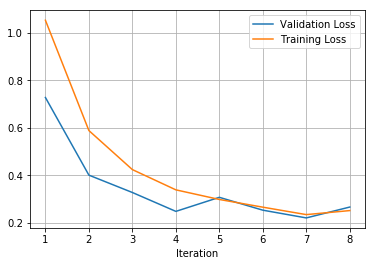

EPOCH 9 ...
Validation Accuracy = 0.928
Training Accuracy = 0.931



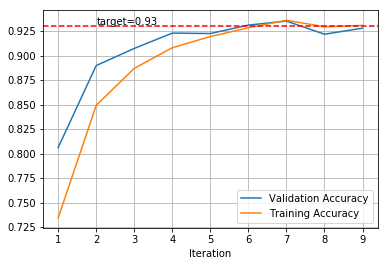

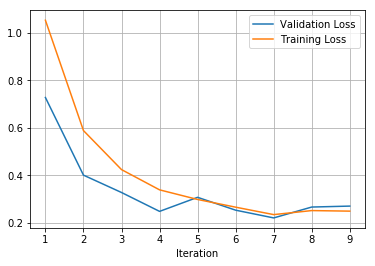

EPOCH 10 ...
Validation Accuracy = 0.934
Training Accuracy = 0.944



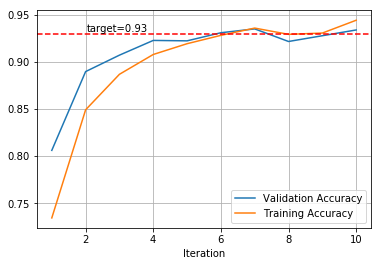

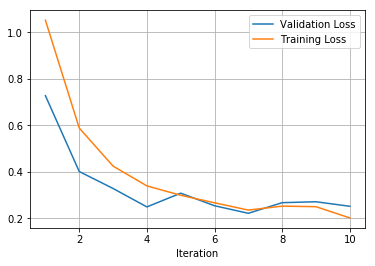

EPOCH 11 ...
Validation Accuracy = 0.937
Training Accuracy = 0.947



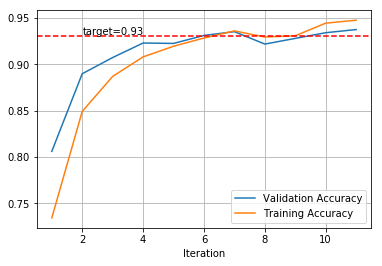

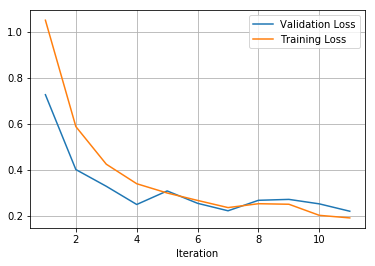

EPOCH 12 ...
Validation Accuracy = 0.914
Training Accuracy = 0.929



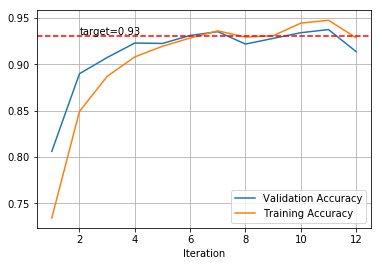

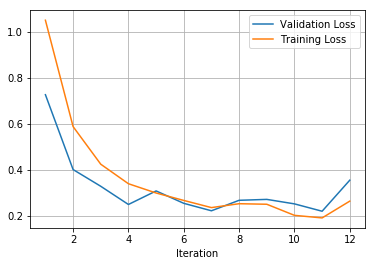

EPOCH 13 ...
Validation Accuracy = 0.941
Training Accuracy = 0.953



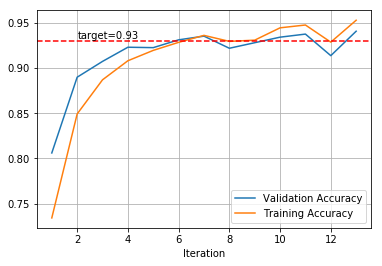

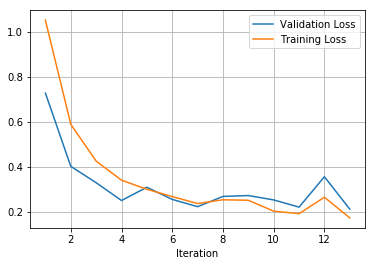

Model saved


In [15]:
# Train the model
CUTOFF_ACC = 0.94
# We log device placement to see if gpu is being used
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_pp)

    print("Using EPOCHS={:d}, BATCH_SIZE={:d}, LEARNING_RATE={:f}, KEEP_PROB={:f}".format(EPOCHS, BATCH_SIZE, LEARNING_RATE, KEEP_PROB))
    va = []
    ta = []
    vl = []
    tl = []
    i_ = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pp[offset:end], y_train_pp[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})

        validation_accuracy = evaluate_acc(X_valid_pp, y_valid)
        training_accuracy = evaluate_acc(X_train_pp, y_train_pp)
        validation_loss = evaluate_loss(X_valid_pp, y_valid)
        training_loss = evaluate_loss(X_train_pp, y_train_pp)

        va.append(validation_accuracy)
        ta.append(training_accuracy)
        vl.append(validation_loss)
        tl.append(training_loss)
        i_.append(i+1)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
        fig, ax = plt.subplots()
        plt.plot(i_, va)
        plt.plot(i_, ta)
        plt.axhline(y=0.93, color='r', linestyle='--')

        ax.grid('on')
        ax.text(2.02, 0.932, 'target=0.93')
        plt.legend(['Validation Accuracy', 'Training Accuracy'])
        plt.xlabel('Iteration')
        
        plt.show()

        fig, ax = plt.subplots()
        plt.plot(i_, vl)
        plt.plot(i_, tl)
 #       plt.axhline(y=0.93, color='r', linestyle='--')

        ax.grid('on')
 #       ax.text(2.02, 0.932, 'target=0.93')
        plt.legend(['Validation Loss', 'Training Loss'])
        plt.xlabel('Iteration')
        
        plt.show()
        
        if (validation_accuracy>CUTOFF_ACC):
            break

    saver.save(sess, './lenet')
    print("Model saved")


---
# OK STOP - WAIT UNTIL PREVIOUS CELL FINISHES !!!
---

In [16]:
# Evaluate the model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate_acc(X_test_pp, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.891


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from os import listdir
from os.path import isfile, join

newimg_folder = './newimgs'
filelist = [ f for f in listdir(newimg_folder) if isfile(join(newimg_folder,f)) ]

newimgs = []

SIDE = 32
for filename in filelist:
    t = cv2.imread( join(newimg_folder, filename) )
    # Convert from BGR to RGB because we loaded it with OpenCV
    b,g,r = cv2.split(t)   # get b,g,r 
    t = cv2.merge([r,g,b]) # switch it to rgb
    t = cv2.resize(t, (SIDE, SIDE))
    newimgs.append(t)

    
n_newimgs = len(newimgs)
print("Loaded {:d} new images.".format(n_newimgs))

Loaded 15 new images.


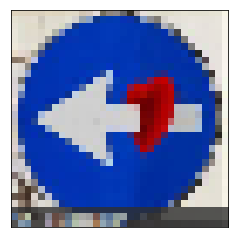

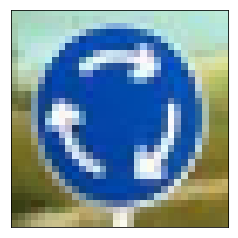

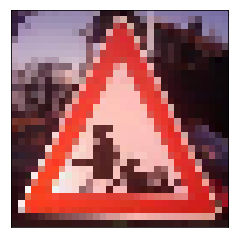

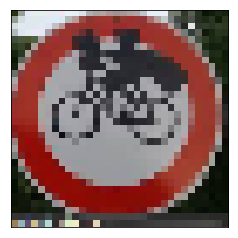

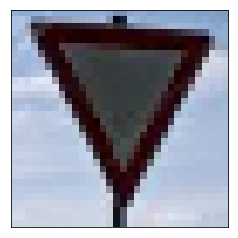

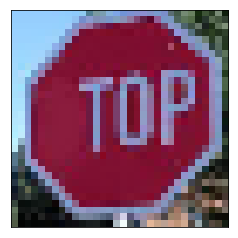

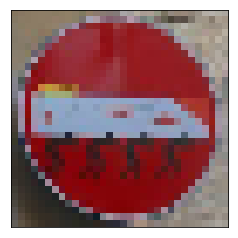

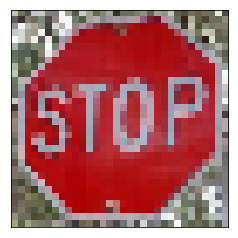

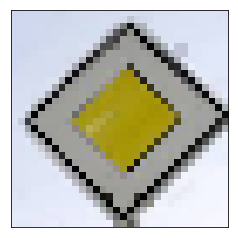

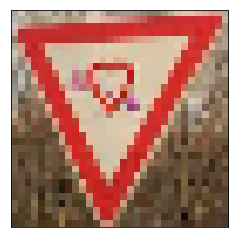

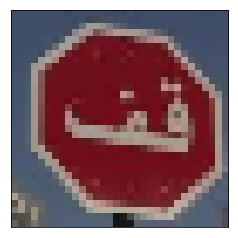

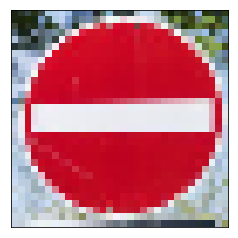

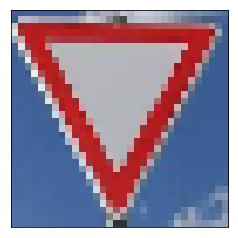

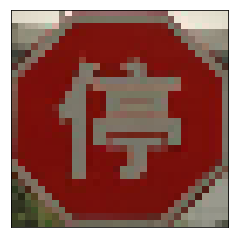

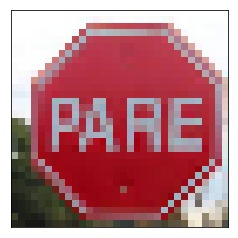

In [18]:
for t in newimgs:
    plt.figure()
    plt.imshow(t), plt.xticks([]), plt.yticks([])
        


Preprocessing new images...
OK


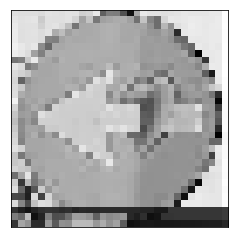

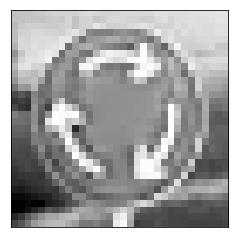

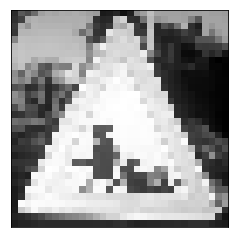

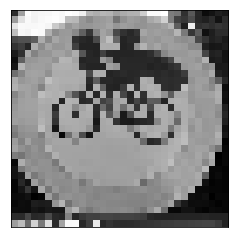

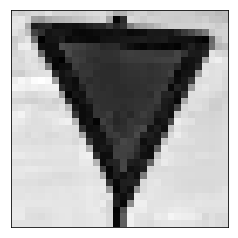

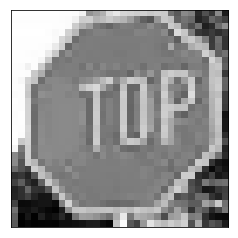

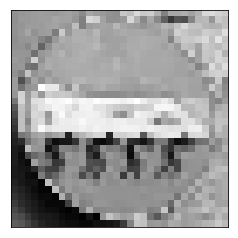

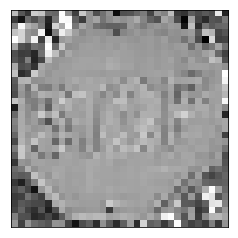

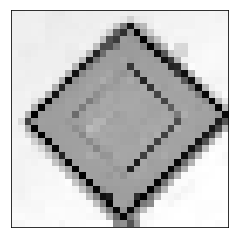

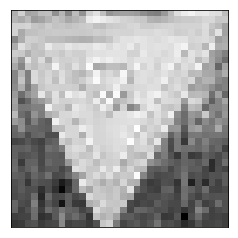

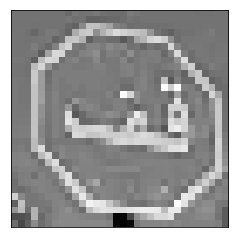

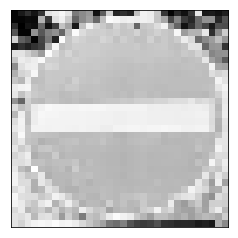

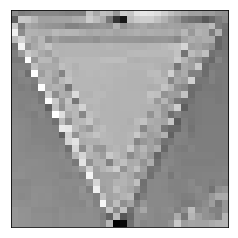

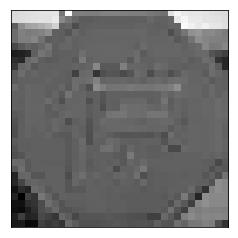

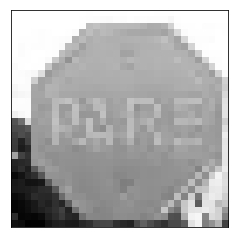

In [19]:
# Preproccess the new images to send to the classifier
print("Preprocessing new images...")
newimgs_pp_ = preprocess_n(newimgs)

print("OK")

for t in newimgs_pp_:
    plt.figure()
    plt.imshow(t,  cmap='gray'), plt.xticks([]), plt.yticks([])
        
newimgs_pp = np.array(newimgs_pp_)[..., np.newaxis]


### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    newimgs_classes = sess.run(logits, feed_dict={x: newimgs_pp, keep_prob : 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
N_SHOW = 5

with tf.Session() as sess:
    topk = sess.run(tf.nn.top_k(tf.constant(newimgs_classes), k=N_SHOW))
    # tf.nn.top_k  it returns two tensors: 
    # 1. the first with the top K value and 
    # 2. the second with the indices of these values in the original tensor.
    prob = topk[0]
    classes = topk[1]


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Load sign names 

import csv

SIGN_NAMES_FILE = './data/signnames.csv'
signname_list = []

with open(SIGN_NAMES_FILE) as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=',')
    for row in csvreader:
        csv_ClassId = row['ClassId']
        csv_SignName = row['SignName']
        signname_list.append(csv_SignName)

- - - - - - - - - - - - - 
Best guess:  Roundabout mandatory
Image:  love2.png
[40  7 14  8 38]
[ 3.01799059 -0.14358497 -0.50216979 -0.73770875 -0.76613081]


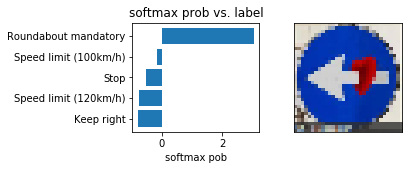

- - - - - - - - - - - - - 
Best guess:  Speed limit (100km/h)
Image:  img_40_01.png
[7 8 3 2 5]
[ 2.73252559  2.37050104  1.99129319  1.81472123  1.7723161 ]


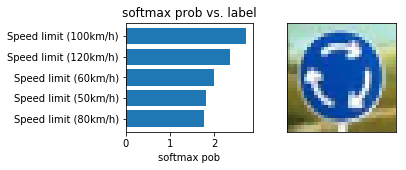

- - - - - - - - - - - - - 
Best guess:  Bumpy road
Image:  women.png
[22 25 29 31 23]
[ 4.45179939  4.211905    4.10997009  3.63319755  2.76851535]


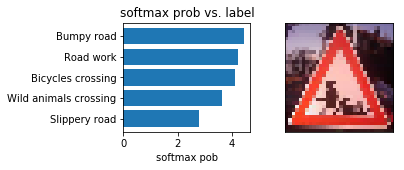

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  et.png
[14  1  2  5  3]
[ 2.95813966  2.42885518  1.99987447  0.68794835  0.52623022]


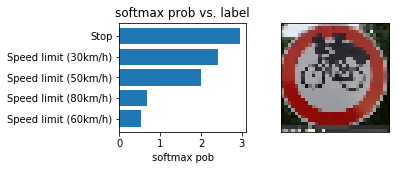

- - - - - - - - - - - - - 
Best guess:  Yield
Image:  img_13_02.png
[13 12 38 34 37]
[ 31.81198883   9.42400455   9.11383057   3.10934162   2.41090202]


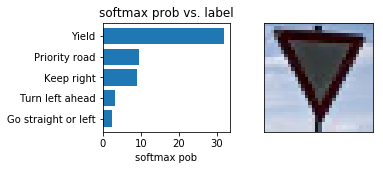

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  top.png
[14 40 34 38 17]
[ 18.26982307   3.54962802   3.52247953   3.25505066   2.95644784]


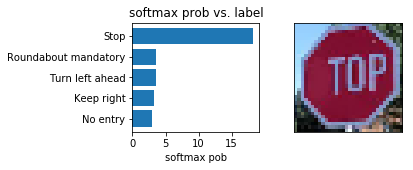

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  king.png
[14 40 17  8 33]
[ 3.22807598  2.90013242  0.16020715  0.12451901 -0.01568121]


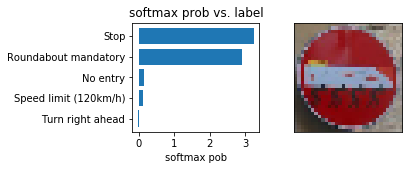

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  img_14_01
[14 40 12 33 17]
[ 7.46038008  4.06996489  3.39976835  1.52481127  0.94072199]


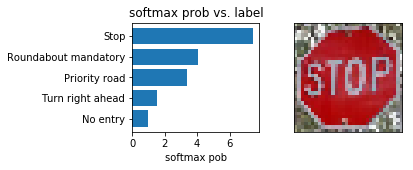

- - - - - - - - - - - - - 
Best guess:  Priority road
Image:  img_12_01.png
[12 40 15 35 34]
[ 27.48889732  11.15075684   5.63093138   4.08976316   0.26858011]


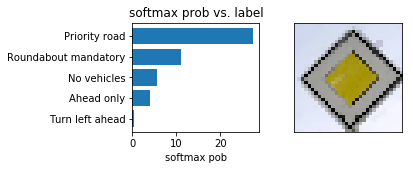

- - - - - - - - - - - - - 
Best guess:  Yield
Image:  love.png
[13 12 34 36 35]
[ 13.99436951   8.62707138   5.59943533   3.69122601   3.48249578]


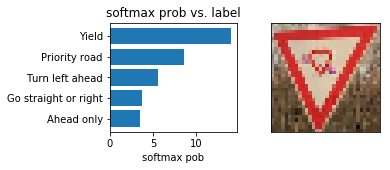

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  stop-arab.png
[14 38  2 40 34]
[ 3.60236835  2.52340078  2.1190958   1.59437108  1.21392381]


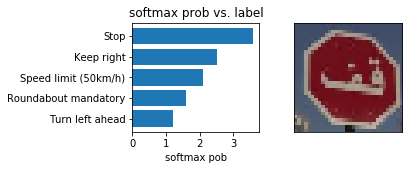

- - - - - - - - - - - - - 
Best guess:  No entry
Image:  img_17_01.png
[17 14 41 38 40]
[ 16.29520798   5.34233665   1.73657322   1.13689351   0.69345284]


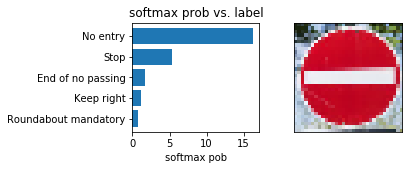

- - - - - - - - - - - - - 
Best guess:  Yield
Image:  img_13_01.png
[13 34 12 36 38]
[ 10.60877609   4.83568335   4.36043549   3.31082582   2.63400984]


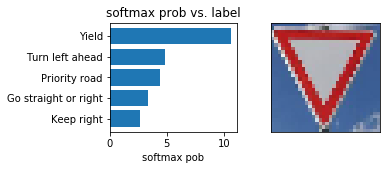

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  stop-chinese.png
[14 40 33 35  3]
[ 4.82167006  2.16484928  1.23177457  0.52644444  0.39520335]


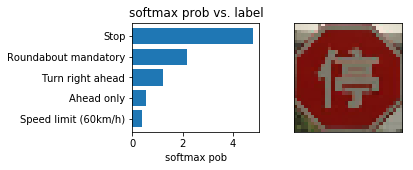

- - - - - - - - - - - - - 
Best guess:  Stop
Image:  stop-spanish.png
[14 34 35 38 17]
[ 9.16983891  3.62680459  3.32751155  3.10932589  3.0349319 ]


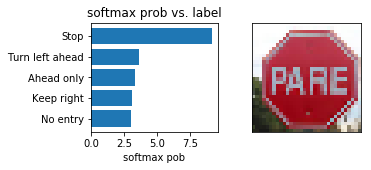

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for k in range(n_newimgs):
    plt.figure(figsize=(5,2))
    plt.subplot(122)
    plt.imshow(newimgs[k]), plt.xticks([]), plt.yticks([])
    plt.subplot(121)
    pos = list(reversed(list(range(N_SHOW))))
    
    print("- - - - - - - - - - - - - ")
    plot_labels = [signname_list[t] for t in classes[k]]
    print("Best guess: ", plot_labels[0])
    
    plt.yticks(pos, plot_labels)
    
    plt.barh(pos, prob[k])
    plt.xlabel('softmax pob')
    plt.title('softmax prob vs. label')
    print("Image: ", filelist[k])
    print(classes[k])
    print(prob[k])
    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.